In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats import pearsonr






In [26]:
df=pd.read_csv('apple.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


In [27]:
# Initial Data Exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


In [28]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [29]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


In [30]:
# Load the dataset using Pandas. Check for null values and understand data types.

#missing values
df.isnull().sum()
# dropping missing values
# df = df.dropna()
# print(df)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
# Examine the time series properties of the data (e.g., frequency, trends).
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

In [33]:
# Check the Frequency of Data

# Determine if the data is daily, weekly, or monthly:
print(df.index.to_series().diff().value_counts())

Date
1 days    8317
3 days    1927
4 days     265
2 days      95
5 days       2
7 days       1
Name: count, dtype: int64


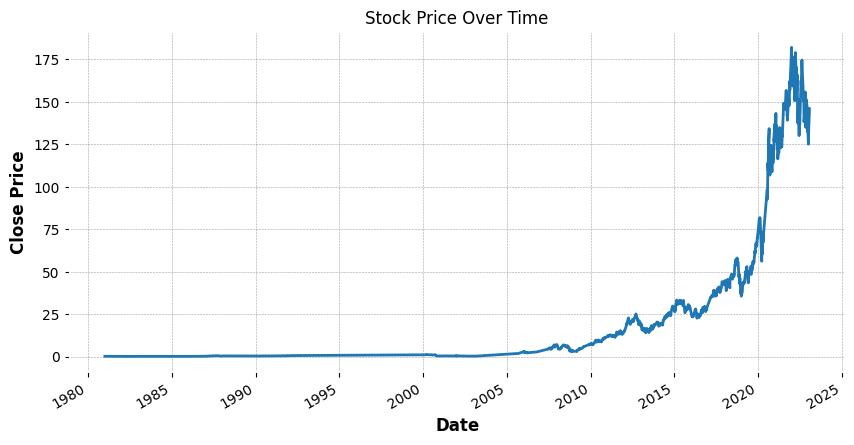

In [34]:
# Identify Trends Over Time

# Plot of the closing prices to see general trends:
import matplotlib.pyplot as plt

df['Close'].plot(title='Stock Price Over Time', figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [35]:
# Data Visualization
# Utilize Matplotlib to plot closing prices and traded volume over time.

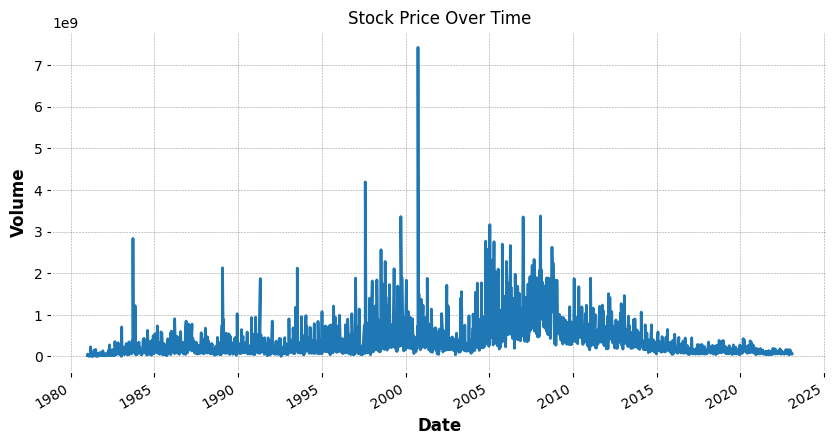

In [36]:
# Opening prices to see general trends

df['Volume'].plot(title='Stock Price Over Time', figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

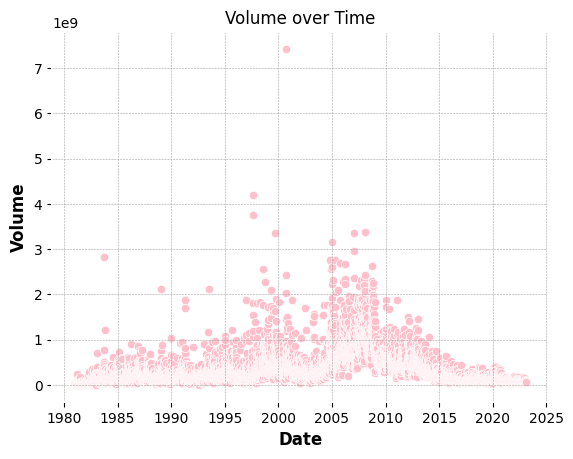

In [37]:
# Scatter plot of Volume vs. Date
import seaborn as sns

sns.scatterplot(data=df, x='Date', y='Volume', color='Pink')
plt.title('Volume over Time')
plt.show()

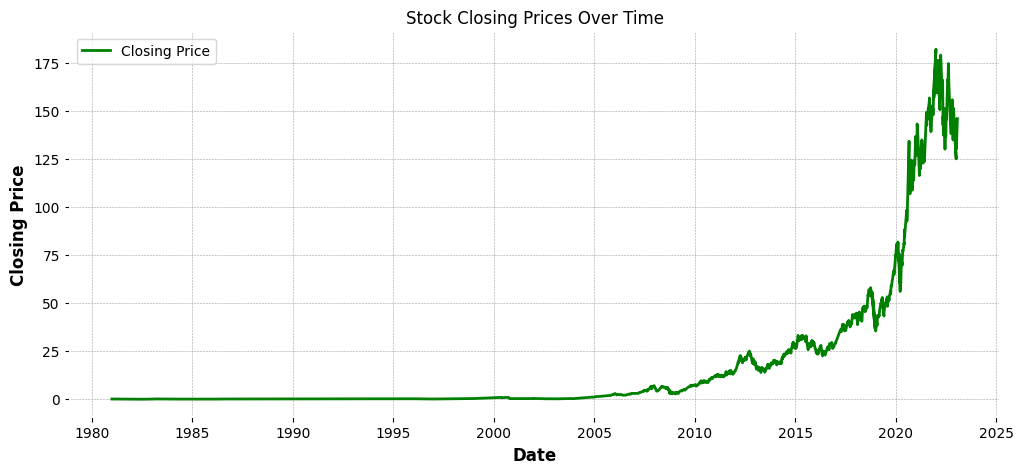

In [38]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Close'], label='Closing Price', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.show()

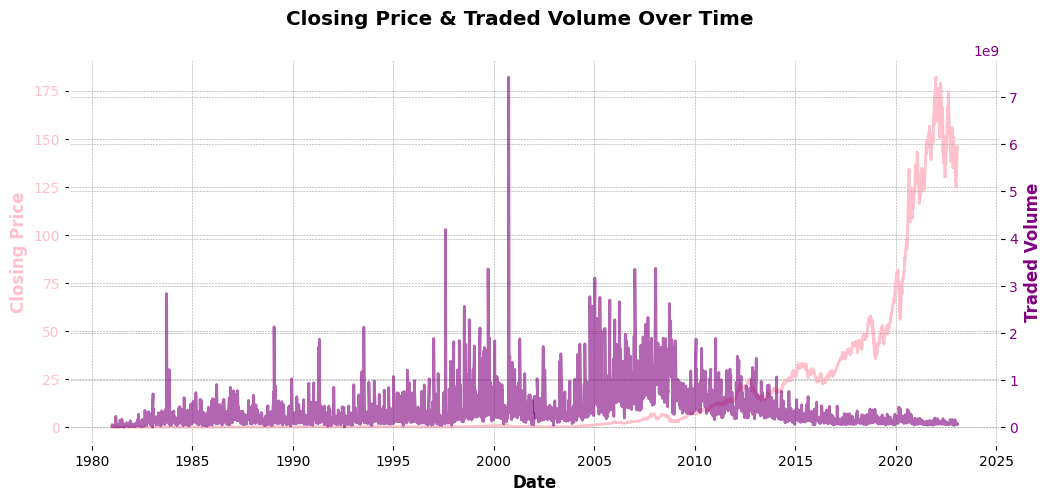

In [39]:
# Dual Plot (Closing Price & Volume Together)

fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='pink')
ax1.plot(df.index, df['Close'], color='pink', label='Closing Price')
ax1.tick_params(axis='y', labelcolor='pink')

ax2 = ax1.twinx()
ax2.set_ylabel('Traded Volume', color='purple')
ax2.plot(df.index, df['Volume'], color='purple', alpha=0.6, label='Traded Volume')
ax2.tick_params(axis='y', labelcolor='purple')

fig.suptitle('Closing Price & Traded Volume Over Time')
plt.show()

c:\Users\micap\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


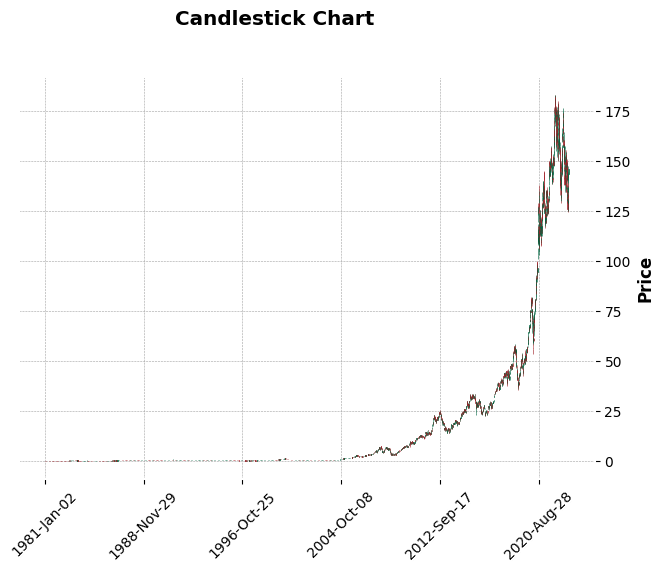

In [40]:



import mplfinance as mpf

mpf.plot(df, type='candle', style='charles', volume=False, title="Candlestick Chart", ylabel='Price')

c:\Users\micap\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


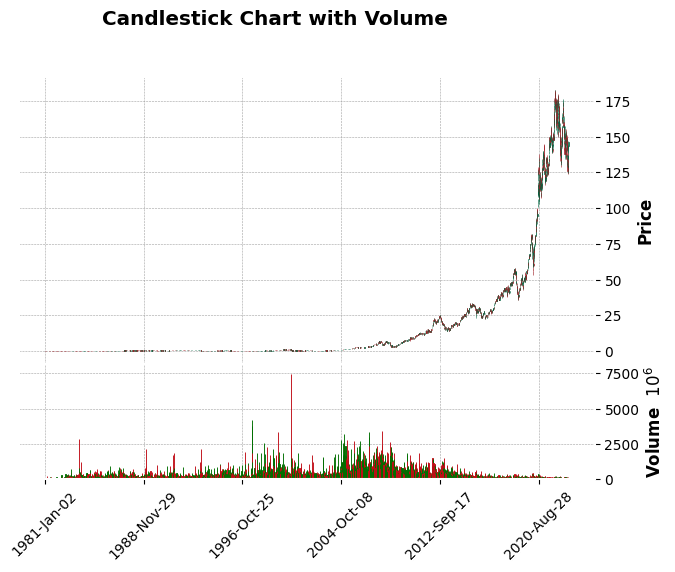

In [41]:
mpf.plot(df, type='candle', style='charles', volume=True, title="Candlestick Chart with Volume", ylabel='Price')

In [42]:
# Statistical Analysis
# Compute summary statistics (mean, median, standard deviation) for key columns.


In [43]:
df['Close']

Date
1981-01-02      0.154018
1981-01-05      0.150670
1981-01-06      0.143973
1981-01-07      0.137835
1981-01-08      0.135045
                 ...    
2023-01-23    141.110001
2023-01-24    142.529999
2023-01-25    141.860001
2023-01-26    143.960007
2023-01-27    145.929993
Name: Close, Length: 10608, dtype: float64

In [44]:
# Analyze closing prices with a moving average.
dix = df['Close'].rolling(window=10).mean()  # 10-day MA
cinq = df['Close'].rolling(window=50).mean()  # 50-day MA (longer trend)



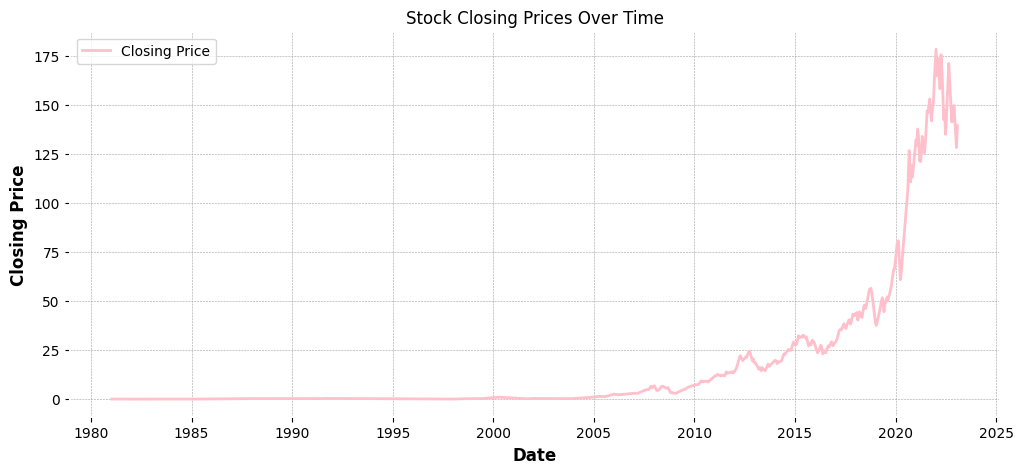

In [45]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, dix, label='Closing Price', color='pink')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.show()

In [46]:
df['Close'] == float('nan')

Date
1981-01-02    False
1981-01-05    False
1981-01-06    False
1981-01-07    False
1981-01-08    False
              ...  
2023-01-23    False
2023-01-24    False
2023-01-25    False
2023-01-26    False
2023-01-27    False
Name: Close, Length: 10608, dtype: bool

In [47]:
df['MA_10']

KeyError: 'MA_10'

In [ ]:
# Hypothesis Testing
# Execute a t-test to compare average closing prices across different years.
import scipy.stats as stats

# I should first define Two Groups for the t-Test (Define high-volume and low-volume groups using median as a threshold):
median_volume = df['Volume'].median()
high_volume_days = df[df['Volume'] >= median_volume]['Close']
low_volume_days = df[df['Volume'] < median_volume]['Close']

# Perform t-test
t_stat, p_value = stats.ttest_ind(high_volume_days, low_volume_days, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -32.59104318990644, P-value: 3.914076006444037e-222


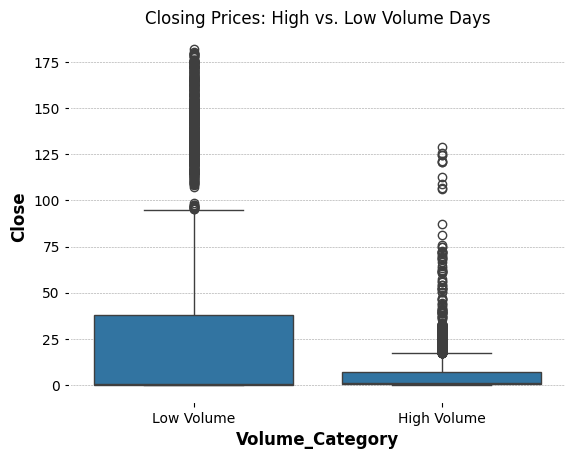

In [ ]:
df['Volume_Category'] = df['Volume'].apply(lambda x: 'High Volume' if x >= median_volume else 'Low Volume')

sns.boxplot(x=df['Volume_Category'], y=df['Close'])
plt.title("Closing Prices: High vs. Low Volume Days")
plt.show()

In [ ]:
# Examine daily returns’ distribution and test for normality using SciPy.

# To do that I should first Calculate Daily Returns
# (Daily returns measure the percentage change in closing price from one day to the next)

df['Daily_Returns'] = df['Close'].pct_change()
print(df['Daily_Returns'])

Date
1981-01-02         NaN
1981-01-05   -0.021738
1981-01-06   -0.044448
1981-01-07   -0.042633
1981-01-08   -0.020242
                ...   
2023-01-23    0.023500
2023-01-24    0.010063
2023-01-25   -0.004701
2023-01-26    0.014803
2023-01-27    0.013684
Name: Daily_Returns, Length: 10608, dtype: float64


In [ ]:
# Then test the normality of daily returns using Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df['Daily_Returns'].dropna())
print(p_value)

1.7898289463728573e-59


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10607.
  res = hypotest_fun_out(*samples, **kwds)
